# Assignment 1 - ML Unplugged
## Author: Aditi Sahu

## 1. Probability using Normal Distribution 
**Given:** Mean = 42 months, Std Dev = 8 months

**Required:** Probability that a Z-Phone lasts between 20 and 30 months

In [23]:
from scipy.stats import norm

mu = 42
sigma = 8
z1 = (20 - mu) / sigma
z2 = (30 - mu) / sigma
prob = norm.cdf(z2) - norm.cdf(z1)
print(f"P(20 < X < 30) = {prob:.4f}")

P(20 < X < 30) = 0.0638


## 2. Censored Data
Given failure times with one censored value (100+)

We apply Maximum Liklihood Estimation (MLE) assuming exponential distribution

In [24]:
import numpy as np

failure_times = [75, 63, 36, 51, 45, 80, 90]
censored_times = [100]  # right-censored

n_fail = len(failure_times)
sum_fail = sum(failure_times)
sum_censored = sum(censored_times)

lambda_mle = n_fail / (sum_fail + sum_censored)
mean_mle = 1 / lambda_mle
print(f"λ: {lambda_mle:.4f}")
print(f"Estimated Mean Lifetime: {mean_mle:.2f} hours")


λ: 0.0130
Estimated Mean Lifetime: 77.14 hours


## 3. Simple Linear Regression 
Given summary stats 

Compute least squares regression line

In [25]:
n = 250
sum_x = 7500
sum_y = 41250
sum_x2 = 285000
sum_xy = 1330000

# a. Calculate slope and intercept
b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
b0 = (sum_y - b1 * sum_x) / n
print(f"Linear Regression Equation: y = {b0:.2f} + {b1:.2f}x")

# b. Predict for age 25
y_hat = b0 + b1 * 25
print(f"Predicted weight for 25-year-old: {y_hat:.2f} lbs")

# c. Calculate residual
y_obs = 170
residual = y_obs - y_hat
print(f"Residual: {residual:.2f}")

# d. Check whether it's overestimated or underestimated
if residual < 0:
    print("The model overestimated the weight.")
else:
    print("The model underestimated the weight.")


Linear Regression Equation: y = 118.75 + 1.54x
Predicted weight for 25-year-old: 157.29 lbs
Residual: 12.71
The model underestimated the weight.


## 4. Descriptive Statistics and Box Plot 
Two datasets: Cold start ignition times for two gasoline types

Sample Mean (Type 1): 2.42, Variance: 0.2854, Std Dev: 0.5342


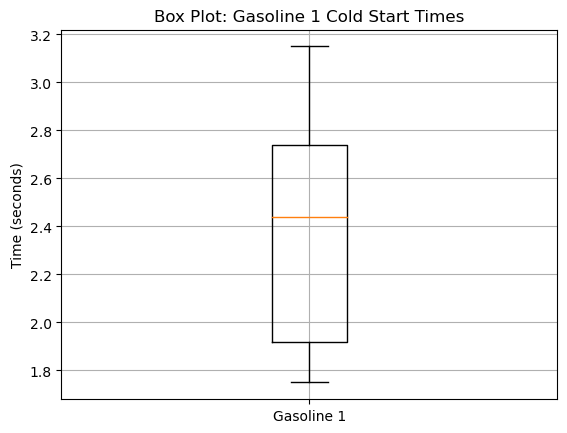

Sample Mean (Type 2): 2.69, Variance: 0.3833, Std Dev: 0.6191


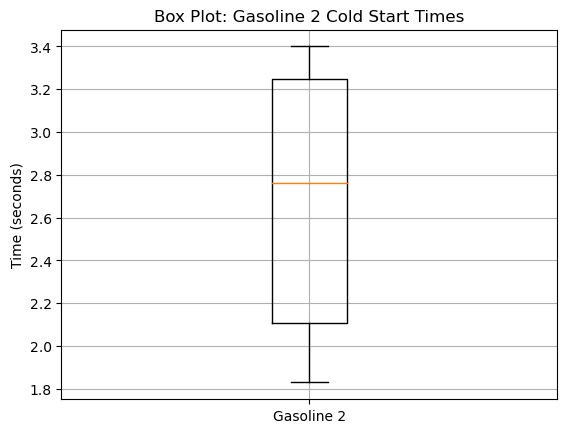

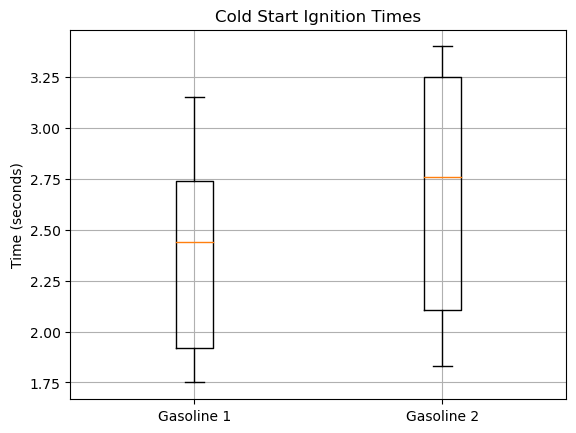

In [26]:
import matplotlib.pyplot as plt

data1 = [1.75, 1.92, 2.62, 2.35, 3.09, 3.15, 2.53, 1.91]
data2 = [1.83, 1.99, 3.13, 3.29, 2.65, 2.87, 3.40, 2.46, 1.89, 3.35]

# Calculate mean, variance, and std deviation for Gasoline 1
mean1 = np.mean(data1)
var1 = np.var(data1, ddof=1)
std1 = np.std(data1, ddof=1)
print(f"Sample Mean (Type 1): {mean1:.2f}, Variance: {var1:.4f}, Std Dev: {std1:.4f}")

# Box plot for data1 only
plt.boxplot(data1, labels=['Gasoline 1'])
plt.title("Box Plot: Gasoline 1 Cold Start Times")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

# Calculate mean, variance, and std deviation for Gasoline 1
mean2 = np.mean(data2)
var2 = np.var(data2, ddof=1)
std2 = np.std(data2, ddof=1)
print(f"Sample Mean (Type 2): {mean2:.2f}, Variance: {var2:.4f}, Std Dev: {std2:.4f}")

# Box plot for data1 only
plt.boxplot(data2, labels=['Gasoline 2'])
plt.title("Box Plot: Gasoline 2 Cold Start Times")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

# Create box plots to compare both gasoline types
plt.boxplot([data1, data2], labels=['Gasoline 1', 'Gasoline 2'])
plt.title("Cold Start Ignition Times")
plt.ylabel("Time (seconds)")
plt.grid(True)
plt.show()

## 5. Linear and Polynomial Regression
Generate synthetic data for y = 4x + 9 + noise

Linear Regression MSE: 0.8047


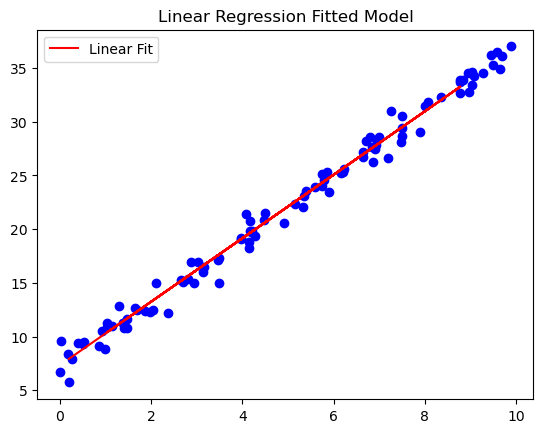

Polynomial Degree 2 MSE: 0.8499


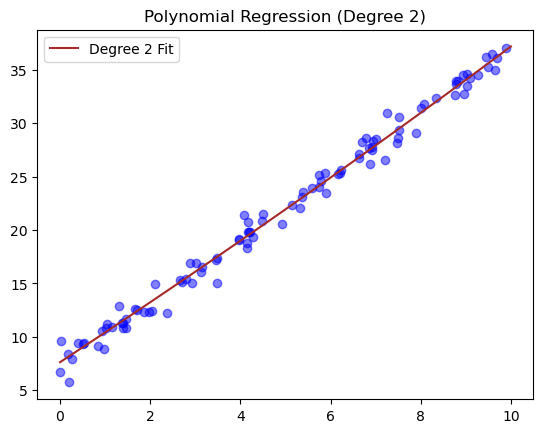

Polynomial Degree 3 MSE: 0.8845


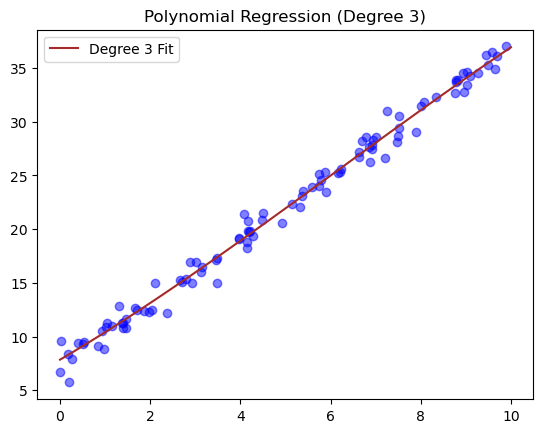

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

np.random.seed(1)
x = np.random.rand(100, 1) * 10
y = 3 * x + 7 + np.random.normal(0, 1, (100, 1))

# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Linear Model (degree 1)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.4f}")

# Plot linear regression line
plt.scatter(x, y, color='blue')
plt.plot(x_test, y_pred, color='red', label='Linear Fit')
plt.title("Linear Regression Fitted Model")
plt.legend()
plt.show()

# Polynomial Models (degree 2 and 3)
for deg in [2, 3]:
    # Create polynomial regression pipeline
    poly_model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression())
    poly_model.fit(x_train, y_train)
    y_poly_pred = poly_model.predict(x_test)
    mse_poly = mean_squared_error(y_test, y_poly_pred)
    print(f"Polynomial Degree {deg} MSE: {mse_poly:.4f}")

    # Plot the polynomial fit curve
    x_line = np.linspace(0, 10, 100).reshape(-1, 1)
    y_line = poly_model.predict(x_line)

    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.plot(x_line, y_line, color='brown', label=f'Degree {deg} Fit')
    plt.title(f"Polynomial Regression (Degree {deg})")
    plt.legend()
    plt.show()
